In [77]:
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn

In [78]:
df_base = pd.read_csv("epoch_table/EPOCH_DATA_BASE.csv")
df_base_weighted = pd.read_csv("epoch_table/EPOCH_DATA_WEIGHTED.csv")
df_truncated = pd.read_csv("epoch_table/EPOCH_DATA_TRUNCATED.csv")
df_truncated_weighted = pd.read_csv("epoch_table/EPOCH_DATA_WEIGHTED_TRUNCATED.csv")

In [79]:
validation_acc_base = df_base['Validation accuracy']
validation_acc_weighted = df_base_weighted['Validation accuracy']
validation_acc_truncated = df_truncated['Validation accuracy']
validation_acc_truncated_weighted = df_truncated_weighted['Validation accuracy']

In [80]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [81]:
plt.style.use('seaborn-v0_8-whitegrid')

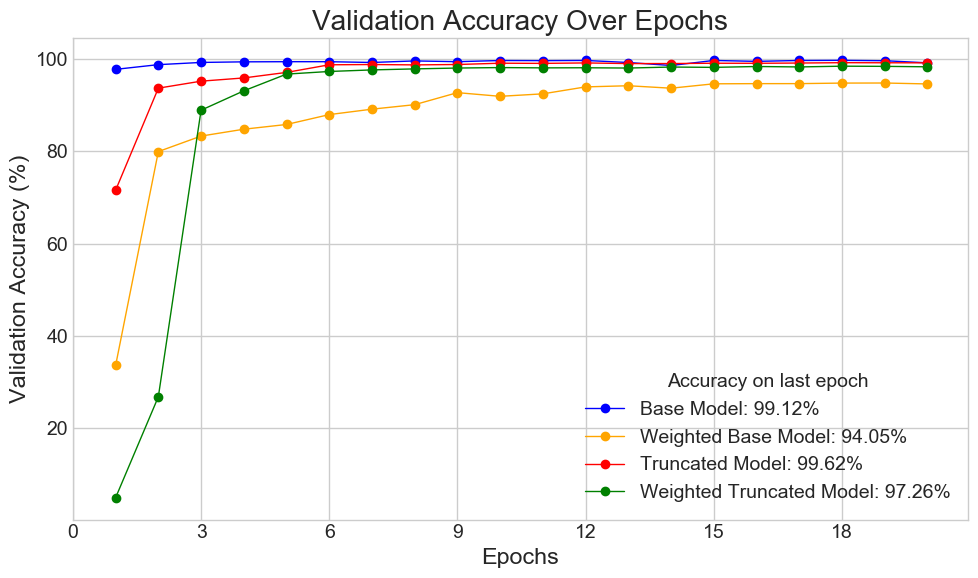

<Figure size 640x480 with 0 Axes>

In [82]:

epochs = range(1, len(validation_acc_base) + 1)  # Assuming the same number of epochs for all models

# Plotting validation accuracy for each model over epochs
plt.figure(figsize=(10, 6))

# Adding an offset to separate the lines for better visibility
offsets = [0, 0.005, -0.005, 0.01]

plt.plot(epochs, validation_acc_base * 100, label='Base Model', marker='o', linestyle='-', linewidth=1, color='blue')
plt.plot(epochs, (validation_acc_weighted + offsets[1]) * 100, label='Weighted Base Model', marker='o', linestyle='-', linewidth=1,  color='orange')
plt.plot(epochs, (validation_acc_truncated + offsets[2]) * 100, label='Truncated Model', marker='o', linestyle='-', linewidth=1,  color='red')
plt.plot(epochs, (validation_acc_truncated_weighted + offsets[3]) * 100, label='Weighted Truncated Model', marker='o', linestyle='-', linewidth=1, color='green')

plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy (%)')
plt.grid(True)
plt.tight_layout()

# Getting the last epoch's validation percentages for each model
last_epoch_acc_base = validation_acc_base.iloc[-1] * 100
last_epoch_acc_weighted = validation_acc_weighted.iloc[-1] * 100
last_epoch_acc_truncated = validation_acc_truncated.iloc[-1] * 100
last_epoch_acc_truncated_weighted = validation_acc_truncated_weighted.iloc[-1] * 100

# Create a custom legend with the accuracy percentages for the last epoch
legend_labels = [
    f'Base Model: {last_epoch_acc_base:.2f}%',
    f'Weighted Base Model: {last_epoch_acc_weighted:.2f}%',
    f'Truncated Model: {last_epoch_acc_truncated:.2f}%',
    f'Weighted Truncated Model: {last_epoch_acc_truncated_weighted:.2f}%'
]

plt.legend(legend_labels, loc='lower right')
# Set a title for the legend box
legend_title = 'Accuracy on last epoch'
plt.legend(legend_labels, title=legend_title, loc='lower right')
# Set xticks to represent each epoch
plt.xticks(range(0,21,3
                ))
plt.savefig("graphs/validation_accuracy_epochs_all_models.png")

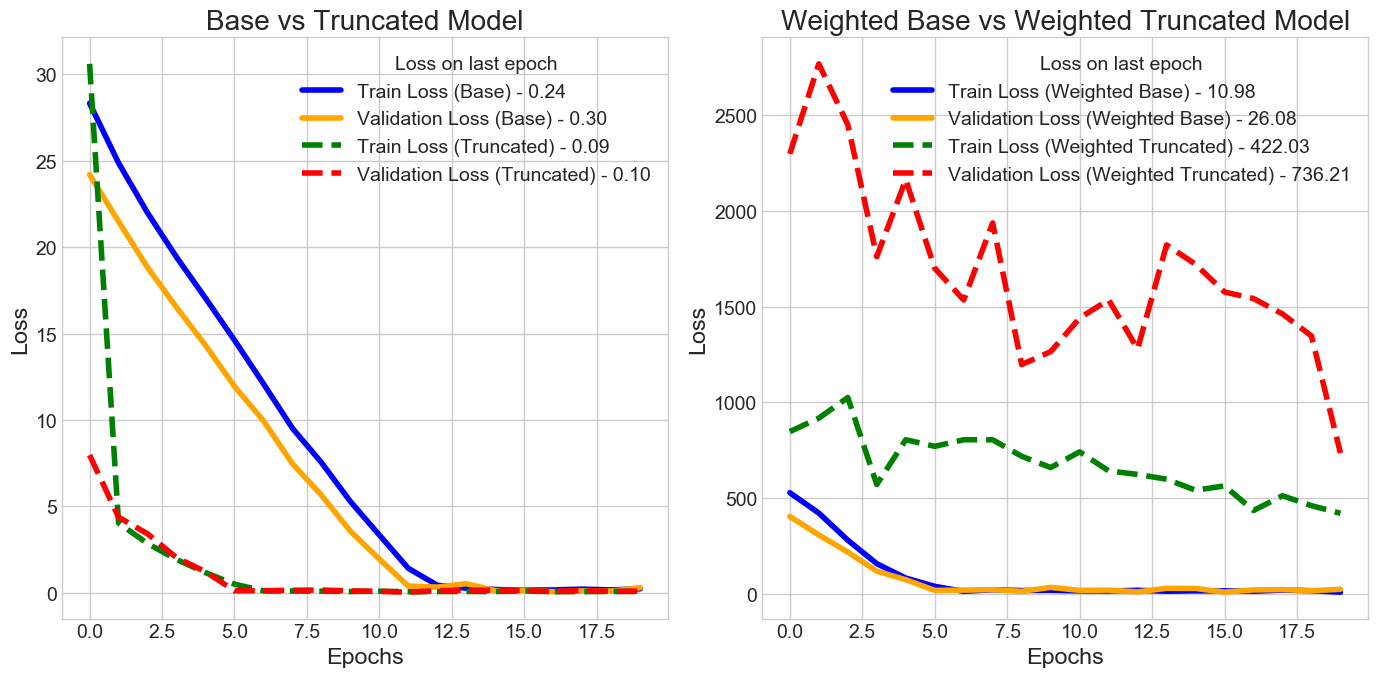

<Figure size 640x480 with 0 Axes>

In [83]:

# Assuming df_base, df_base_weighted, df_truncated, and df_truncated_weighted contain the loss data

# Data for base and weighted base models
train_loss_base = df_base['Train Loss']
validation_loss_base = df_base['Validation Loss']
train_loss_weighted = df_base_weighted['Train Loss']
validation_loss_weighted = df_base_weighted['Validation Loss']

# Data for truncated and weighted truncated models
train_loss_truncated = df_truncated['Train Loss']
validation_loss_truncated = df_truncated['Validation Loss']
train_loss_truncated_weighted = df_truncated_weighted['Train Loss']
validation_loss_truncated_weighted = df_truncated_weighted['Validation Loss']

# Creating a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))  # Larger figure size (14x7)

# Plotting validation and train loss for base and truncated models
axes[0].plot(train_loss_base, label=f'Train Loss (Base) - {train_loss_base.iloc[-1]:.2f}', color='blue')
axes[0].plot(validation_loss_base, label=f'Validation Loss (Base) - {validation_loss_base.iloc[-1]:.2f}', color='orange')
axes[0].plot(train_loss_truncated, label=f'Train Loss (Truncated) - {train_loss_truncated.iloc[-1]:.2f}', linestyle='--', color='green')
axes[0].plot(validation_loss_truncated, label=f'Validation Loss (Truncated) - {validation_loss_truncated.iloc[-1]:.2f}', linestyle='--', color='red')
axes[0].set_title('Base vs Truncated Model')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Plotting validation and train loss for weighted base and weighted truncated models
axes[1].plot(train_loss_weighted, label=f'Train Loss (Weighted Base) - {train_loss_weighted.iloc[-1]:.2f}', color='blue')
axes[1].plot(validation_loss_weighted, label=f'Validation Loss (Weighted Base) - {validation_loss_weighted.iloc[-1]:.2f}', color='orange')
axes[1].plot(train_loss_truncated_weighted, label=f'Train Loss (Weighted Truncated) - {train_loss_truncated_weighted.iloc[-1]:.2f}', linestyle='--', color='green')
axes[1].plot(validation_loss_truncated_weighted, label=f'Validation Loss (Weighted Truncated) - {validation_loss_truncated_weighted.iloc[-1]:.2f}', linestyle='--', color='red')
axes[1].set_title('Weighted Base vs Weighted Truncated Model')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

legend_title = 'Loss on last epoch'
axes[0].legend( title=legend_title)
axes[1].legend( title=legend_title)


plt.tight_layout()
plt.savefig("graphs/training_and_validation_loss_of_all_models.png")
